In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["figure.figsize"] = 18, 6

In [ ]:
def get_stock_data(stock_name: str, starting_year: int, ending_year: int) -> pd.Series:
    """
    Get close price data from stock.

    Args:
        stock_name (str): The stock symbol.
        starting_year (int): The year to start collecting data.
        ending_year (int): The year to stop collecting data.

    Return:
        pd.Series: close prices from stock.
    """
    df = yf.Ticker(f'{stock_name}.SA').history(start=f'{starting_year}-01-01', end=f'{ending_year}-12-31')
    df = df.reset_index()
    df["Date"] = pd.to_datetime(df["Date"].dt.strftime("%Y-%m-%d"))
    df.index = df["Date"]
    return df.Close

In [16]:
def stock_plot(stock_name: str, series: pd.Series) -> None:
    """
    Plot price data from a given stock series.
    
    Args:
        stock_name (str): The stock symbol.
        series (pd.Series): The Series of prices.
    """
    plt.plot(series)
    plt.xlabel("Ano")
    plt.ylabel("Preço (R$)")
    plt.title(f"Histórico de Preços da Ação {stock_name}")
    plt.show()

In [4]:
bb_history = get_stock_data(stock_name="BBAS3", starting_year=2017, ending_year=2024)

In [19]:
bb_history.describe()

count    1992.000000
mean       15.727051
std         5.409767
min         7.959166
25%        11.486724
50%        14.262505
75%        18.160816
max        28.325697
Name: Close, dtype: float64

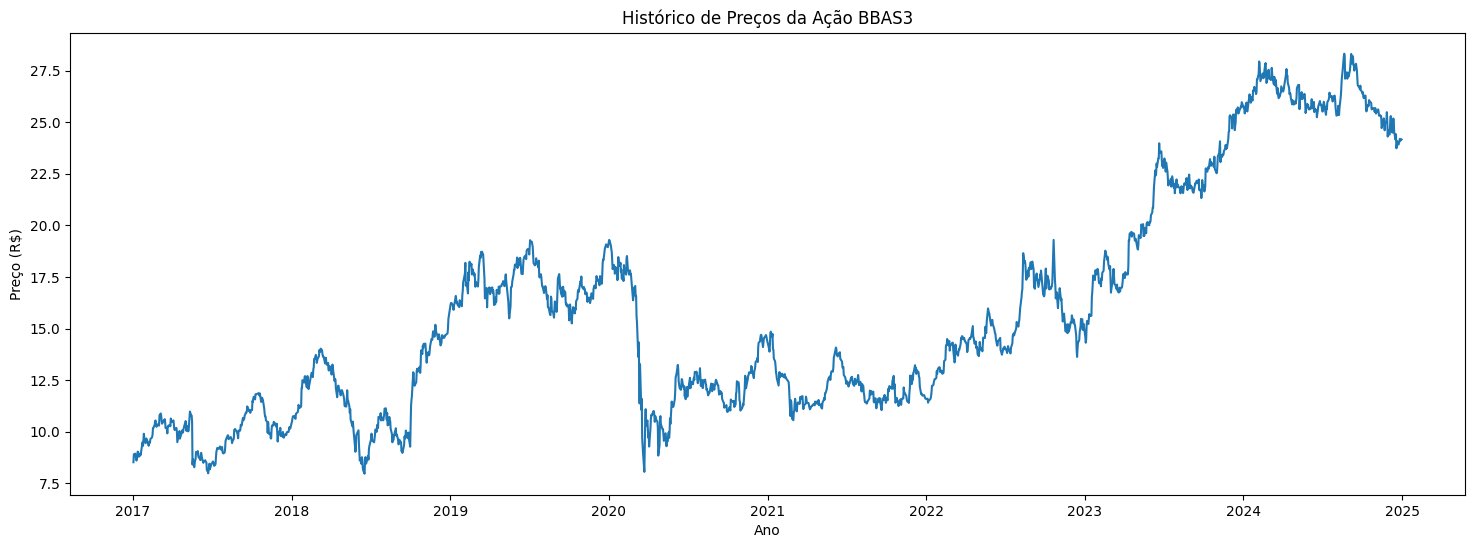

In [17]:
stock_plot(stock_name="BBAS3", series=bb_history)

In [24]:
def get_stock_data_and_plot(stock_name: str, starting_year: int, ending_year: int) -> None:
    series = get_stock_data(stock_name, starting_year, ending_year)
    print(series.describe())
    stock_plot(stock_name, series)

count    1992.000000
mean       20.481601
std         5.839010
min        12.954427
25%        15.490560
50%        18.709426
75%        25.352990
max        35.241863
Name: Close, dtype: float64


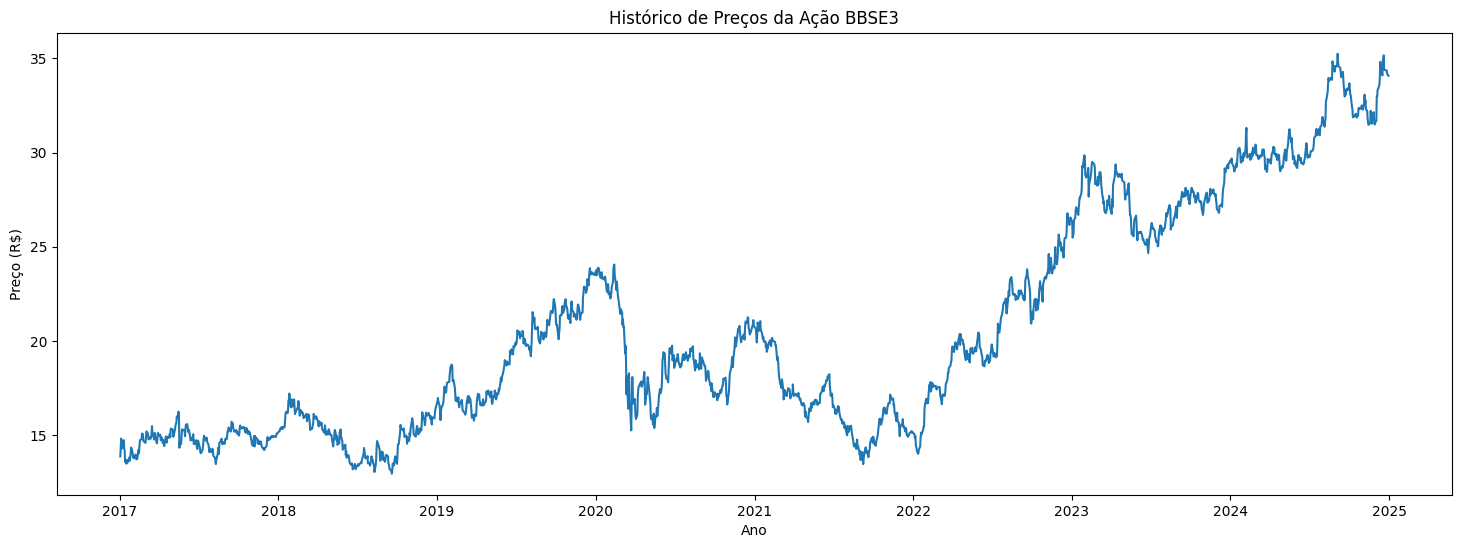

In [25]:
get_stock_data_and_plot(stock_name="BBSE3", starting_year=2017, ending_year=2024)